<a href="https://colab.research.google.com/github/AUT-Student/CN-HW2/blob/main/CN_HW2_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><b>In the name of God</b></center>

<b>Course</b>: Complex Network
<br>
<b>Description:</b> HomeWork 2 | Question 3
<br>
<b>Developer</b>: Alireza Mazochi (400131075)

# Libraries

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

In [2]:
!pip install --upgrade scipy networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 23.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


# Dataset

In [2]:
!gdown 17050A6f0ATXkkmaqB9aI7fxAa8zfHO5C

Downloading...
From: https://drive.google.com/uc?id=17050A6f0ATXkkmaqB9aI7fxAa8zfHO5C
To: /content/CN_HW2_dataset.zip
100% 282k/282k [00:00<00:00, 52.8MB/s]


In [3]:
!unzip /content/CN_HW2_dataset.zip

Archive:  /content/CN_HW2_dataset.zip
replace airports.codes? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: airports.codes          
  inflating: airports.edges          
  inflating: bible.edges             
  inflating: bible.names             
  inflating: name_of_airports.csv    


In [4]:
graph = nx.Graph()

with open("/content/bible.edges") as file:
  for i, line in enumerate(file.readlines()):
    source, destination = line.split()[:2]
    graph.add_edge(source, destination)

# Laplace Matrix

In [5]:
def Laplace(graph):
  A = nx.adjacency_matrix(graph).todense()
  D = np.zeros((nx.number_of_nodes(graph), nx.number_of_nodes(graph)))

  i = 0
  for (node, val) in graph.degree():
    D[i,i] = val
    i += 1
  
  return D - A

In [6]:
laplace_graph = Laplace(graph)

# Eigen Vector

In [7]:
values, vectors = np.linalg.eig(laplace_graph)

In [8]:
idx = values.argsort()[::-1]   
values = values[idx]
vectors = vectors[:,idx]

In [9]:
ss_vector = np.array([float(x) for x in vectors[-2]])

<ipython-input-9-e2c5cb249bbb>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  ss_vector = np.array([float(x) for x in vectors[-2]])


# Modularity & Cut

In [10]:
def modularity(graph, clusters):
  m = graph.number_of_edges()
  output = 0
  for cluster in set(clusters):
    cluster_nodes = []
    for i, node in enumerate(graph.nodes()):
      if cluster == clusters[i]:
        cluster_nodes.append(node)

    for node_i in cluster_nodes:
      for node_j in cluster_nodes:
        Aij = int(graph.has_edge(node_i, node_j))
        ki = graph.degree(node_i)
        kj = graph.degree(node_j)
        output += Aij - (ki*kj)/(2*m)
  
  output/=2*m
  return output

In [11]:
def cut(graph, clusters):
  output = 0
  for i, node_i in enumerate(graph.nodes()):
    for j, node_j in enumerate(graph.nodes()):
      if i<j and clusters[i]!=clusters[j] and graph.has_edge(node_i, node_j):
        output += 1

  return output

# Results

In [23]:
modularity_scores = list()
cut_scores = list()
for n_clusters in range(1, 100):
  kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(ss_vector.reshape(-1, 1))
  modularity_score = modularity(graph, kmeans.labels_)
  cut_score = cut(graph, kmeans.labels_)

  modularity_scores.append(modularity_score)
  cut_scores.append(cut_score)

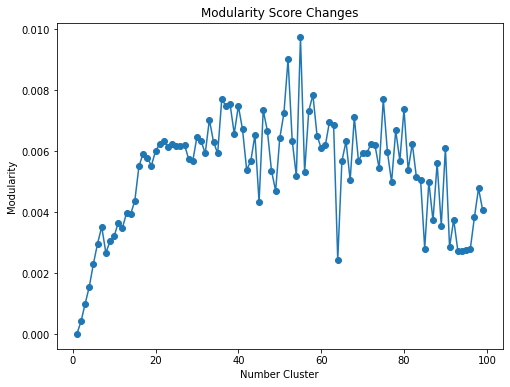

In [31]:
plt.scatter(range(1, 100), modularity_scores)
plt.plot(range(1, 100), modularity_scores)

plt.title("Modularity Score Changes")
plt.xlabel("Number Cluster")
plt.ylabel("Modularity")
plt.gcf().set_size_inches(8, 6)
plt.show()

In [26]:
np.argmax(modularity_scores)

54

In [27]:
modularity_scores[54]

0.009728892757417238

In [28]:
cut_scores[54]

5291